# Creating a K Nearest Neighbors Model from Scratch

In this notebook, we will build a K Nearest Neighbors model from scratch, then visualize the results. This is just to have a deeper understanding of the theory behind K Nearest Neighbors models.

Let's start by importing some libraries we will be using, and creating a dataset for our model.

In [1]:
import numpy as np
from math import sqrt
import matplotlib.pyplot as plt
import warnings #to warn when user is trying to use a bad number for k
from matplotlib import style
from collections import Counter
style.use('fivethirtyeight')

#this dataset is a class that's a list of lists
dataset = {'k': [[1,2],[2,3],[3,1]], 'r':[[6,5],[7,7],[8,6]]}
new_features = [5,7]

Let's populate a plot and visualize the results. The new feature our model will be attempting to predict will be colored blue, while the existing groups will be red and black.

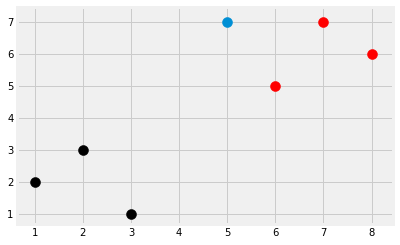

In [2]:
[[plt.scatter(ii[0],ii[1], s=100, color=i) for ii in dataset[i]] for i in dataset]

plt.scatter(new_features[0], new_features[1], s=100)
plt.show()

Great. Now let's build the K Nearest Neighbors algorithm.

We have to compare every point to every other point in the data (unless we set a maximum radius). We will compare using euclidean distance.

Each point will have an array created with its nearest neighbors determined by the shortest euclidean distance. Whatever we set K to will then determine the amount of neighbors for that point that will be used, and a group will be assigned to the new value equal to the group of whichever neighbor is most common. We are defaulting K to 3 unless otherwise specified.

We will also include a print statement in the function to let us know how many 'votes' went to the assigned group.

In [3]:
def k_nearest_neighbors(data, predict, k=3):
    if len(data) >= k:
        warnings.warn('K is set to a value less than total value groups!')
    distances = []
    for group in data:
        for features in data[group]:
            euclidean_distance = np.linalg.norm(np.array(features)-np.array(predict))
            distances.append([euclidean_distance, group])
            votes = [i[1] for i in sorted(distances) [:k]]
    print(Counter(votes).most_common(1))
    vote_result = Counter(votes).most_common(1)[0][0]
    
    return vote_result

In [4]:
result = k_nearest_neighbors(dataset, new_features, k=3)
print(result)

[('r', 3)]
r


We can see the new feature was assigned to the red group, as we believe it should have been after eyeballing it. Looks like this model was successful.

Let's visualize the results.

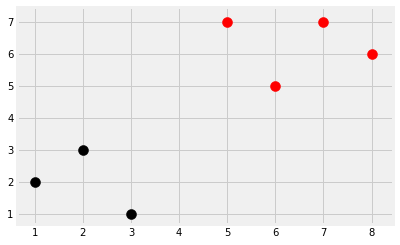

In [5]:
[[plt.scatter(ii[0],ii[1], s=100, color=i) for ii in dataset[i]] for i in dataset]
plt.scatter(new_features[0], new_features[1], color=result, s=100) #color will match the result
plt.show()